# Cleaning!

## GOALS

1. Identify a search term or hashtag having to do with an urban (or related) issue, problem, or application (e.g., #muralarts, #patco, #wisconsinrecount, etc.)
2. Adapt the code provided for the class examples to do the following:
<ul>
    <li>a. Extract the most recent (at most) 10,000 tweets that contain that search term/hashtag</li>
    <li>b. Clean the tweets (i.e., remove stop words, numbers, suffixes, etc.)</li>
    <li>c. Create a word cloud of the terms in the tweets</li>
    <li>d. Map the tweets</li>
<ul>

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point

import time
import requests
from datetime import datetime
import calendar

from matplotlib import pyplot as plt
import seaborn as sns

import hvplot.pandas
import holoviews as hv

In [16]:
tweets = pd.read_csv(r'.\data\geo_results.csv')
geos = pd.read_csv(r'.\data\tweet_places2.csv')

In [6]:
geos.head()

,tweet_places,full_name
0,NaN,NaN
1,"Austin, TX","Austin, TX"
2,"Brooklyn, NY","Brooklyn, NY"
3,NaN,NaN
4,NaN,NaN


In [7]:
tweets.head()

,created_at,geo,id,text,withheld
0,2021-12-13 04:05:36+00:00,NaN,1470243481507360768,RT @PBBabscbn: You have the power to vote for ...,NaN
1,2021-12-13 04:05:29+00:00,NaN,1470243453217001474,RT @thetirekinge: @lekurokami Omg! Poor baby. ...,NaN
2,2021-12-13 04:05:11+00:00,NaN,1470243378566557698,RT @iamjavid111: Best Female Contestant In BB ...,NaN
3,2021-12-13 04:04:35+00:00,NaN,1470243224685932547,RT @Article14live: #Hindu extremists attacked ...,NaN
4,2021-12-13 04:04:17+00:00,NaN,1470243150253879297,RT @real_khabri_1: It is really sad to see mak...,NaN


### Get rid of URLS

In [10]:
print(tweets["text"][1])

RT @thetirekinge: @lekurokami Omg! Poor baby. Imagine having the best sleep of your life only to be evicted by the landlord cause you outgr…


In [17]:
def remove_url(txt):
    """
    Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    import re
    return " ".join(re.sub("https://t.co/[A-Za-z\\d]+|&amp", "", txt).split())

In [18]:
tweets_no_urls = [remove_url(tweet) for tweet in tweets["text"]]
tweets_no_urls[:5]

['RT @PBBabscbn: You have the power to vote for Alexa! To VOTE VIA KUMU: Go to Kumu campaigns and choose Vote to Save or Vote to Evict a Hou…',
 'RT @thetirekinge: @lekurokami Omg! Poor baby. Imagine having the best sleep of your life only to be evicted by the landlord cause you outgr…',
 'RT @iamjavid111: Best Female Contestant In BB House RJ KAJAL Evicted👏👏Hugs and Stuffs Footage Candidates in FINALIST #BiggBoss5telugu',
 'RT @Article14live: #Hindu extremists attacked his prayer service, but #Karnataka pastor Somu Avaradhi was jailed for 10 days. Landlord evic…',
 'RT @real_khabri_1: It is really sad to see makers bringing #UmarRiaz profession time ; again. At least he is doing something in the house.…']

### Extract a list of lower-cased words in a tweet

- `.lower()` makes all words lower cased
- `.split()` splits a string into the individual words

In [19]:
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]
words_in_tweet[:1]

[['rt',
  '@pbbabscbn:',
  'you',
  'have',
  'the',
  'power',
  'to',
  'vote',
  'for',
  'alexa!',
  'to',
  'vote',
  'via',
  'kumu:',
  'go',
  'to',
  'kumu',
  'campaigns',
  'and',
  'choose',
  'vote',
  'to',
  'save',
  'or',
  'vote',
  'to',
  'evict',
  'a',
  'hou…']]

### Remove stop words and punctuation

Common words that do not carry much significance and are often ignored in text analysis.

In [7]:
# import stop words

import nltk
nltk.download('stopwords');

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
stop_words = list(set(nltk.corpus.stopwords.words('english')))
stop_words[:-10]

['whom',
 've',
 'their',
 'shouldn',
 'themselves',
 'has',
 "you've",
 'before',
 'for',
 'his',
 'have',
 'on',
 'her',
 'just',
 "aren't",
 'all',
 'is',
 'now',
 'under',
 'does',
 't',
 'more',
 'mightn',
 'don',
 'these',
 'couldn',
 'they',
 'be',
 'once',
 'same',
 'herself',
 'as',
 'nor',
 'won',
 'he',
 'what',
 'too',
 'being',
 'it',
 'when',
 'after',
 'needn',
 'down',
 'do',
 'some',
 'into',
 'ain',
 'both',
 'by',
 "you're",
 'from',
 'will',
 'my',
 'aren',
 "weren't",
 'i',
 'those',
 'in',
 'should',
 "isn't",
 'but',
 'll',
 'here',
 "wouldn't",
 'your',
 'over',
 'very',
 "needn't",
 "hadn't",
 'having',
 'out',
 'you',
 "won't",
 "wasn't",
 'she',
 'our',
 'other',
 'off',
 'no',
 'and',
 'd',
 'hadn',
 'with',
 'so',
 'didn',
 'am',
 "you'll",
 'below',
 'to',
 'yours',
 'had',
 'through',
 'further',
 'if',
 'again',
 'who',
 'm',
 're',
 'itself',
 'against',
 "it's",
 "mightn't",
 'hasn',
 'ours',
 'of',
 "shan't",
 'yourself',
 'its',
 'ourselves',
 'own',

In [21]:
## gotta get rid of "rt" too.
rt = ["rt"]
rt

['rt']

### Get the list of common punctuation

In [22]:
import string

In [23]:
punctuation = list(string.punctuation)
punctuation[:5]

['!', '"', '#', '$', '%']

## Remove stop words from our tweets

In [24]:
ignored = stop_words + punctuation + rt

In [25]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if word not in ignored]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['@pbbabscbn:',
 'power',
 'vote',
 'alexa!',
 'vote',
 'via',
 'kumu:',
 'go',
 'kumu',
 'campaigns',
 'choose',
 'vote',
 'save',
 'vote',
 'evict',
 'hou…']

### Counting word frequencies

We'll define a helper function to calculate word frequencies from our lists of words.

In [27]:
def count_word_frequencies(words_in_tweet, top=15):
    """
    Given a list of all words for every tweet, count
    word frequencies across all tweets.
    
    By default, this returns the top 15 words, but you 
    can specify a different value for `top`.
    """
    import itertools, collections

    # List of all words across tweets
    all_words = list(itertools.chain(*words_in_tweet))

    # Create counter
    counter = collections.Counter(all_words)
    
    return pd.DataFrame(counter.most_common(top),
                        columns=['words', 'count'])

In [28]:
counts_nsw = count_word_frequencies(tweets_nsw)
counts_nsw.head()

,words,count
0,vote,14464
1,evicted,12263
2,evict,12025
3,eviction,7124
4,na,5123


### Plotting with our keyterms

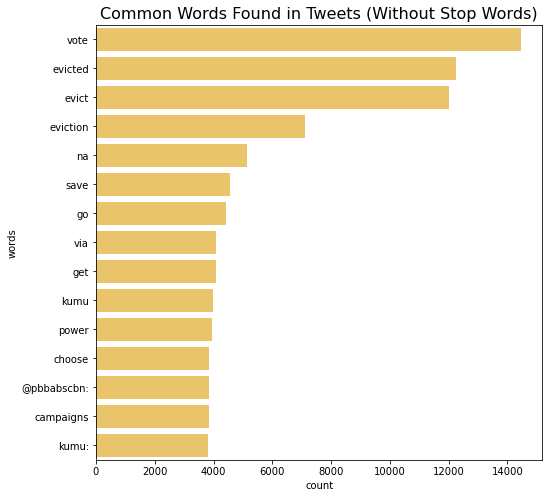

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.barplot(
    y="words",
    x="count",
    data=counts_nsw.sort_values(by="count", ascending=False),
    ax=ax,
    color="#e9c46aff",
    saturation=1.0,
)

ax.set_title("Common Words Found in Tweets (Without Stop Words)", fontsize=16);

### Plotting withOUT our keyterms

In [30]:
search_terms = ['evictions', "evicted", "evict", "eviction"]
tweets_final = [[w for w in word if w not in search_terms]
                 for word in tweets_nsw]

In [31]:
# frequency counts
counts_final = count_word_frequencies(tweets_final)

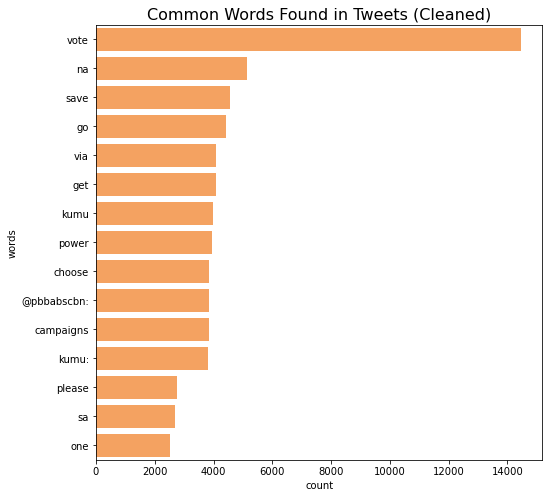

In [121]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.barplot(
    y="words",
    x="count",
    data=counts_final.sort_values(by="count", ascending=False),
    ax=ax,
    color="#f4a261ff",
    saturation=1.0,
)

ax.set_title("Common Words Found in Tweets (Cleaned)", fontsize=16)
plt.savefig('commonwords.png')


## Mapping Tweets

In [33]:
from geopy.geocoders import Nominatim

In [38]:
unique_places = geos["full_name"].unique()

In [81]:
uplaces = unique_places.tolist()

In [82]:
uplaces.remove('Central Region, Singapore')
uplaces.remove("Perambur Purasavakam, India")
uplaces.remove("Anekal Bangaluru, India")
uplaces.remove("Rae Bareily, India")

In [73]:
uplaces

[nan,
 'Austin, TX',
 'Brooklyn, NY',
 'Pennsylvania, USA',
 'Guwahati, India',
 'Glasgow, Scotland',
 'Galway, Ireland',
 'Pinellas Park, FL',
 'North Region, Singapore',
 'Calumet City, IL',
 'Silver Spring, MD',
 'Phoenix, AZ',
 'Colorado, USA',
 'Sparks, NV',
 'Nevada, USA',
 'Hayathnagar, India',
 'Chirala, India',
 'Tacloban City, Eastern Visayas',
 'Dunwoody, GA',
 'East Point, GA',
 'Zanesville, OH',
 'Mandaue City, Central Visayas',
 'Davao City, Davao Region',
 'Dasmarinas, Calabarzon',
 'Pasay City, National Capital Region',
 'Olongapo City, Central Luzon',
 'Salfords, South East',
 'Israel',
 'Cagayan De Oro City, Northern Mindanao',
 'Golborne, England',
 'Rietberg, Deutschland',
 'Rajendra Nagar, India',
 'Worcester, England',
 'Ajman, United Arab Emirates',
 'Buffalo, NY',
 'Hyderabad, India',
 'New York, USA',
 'Faversham, England',
 'Arkansas, USA',
 'Dallas, TX',
 'Republic of the Philippines',
 'Mandaluyong City, National Capital Region',
 'Tanza, Calabarzon',
 'Pitt

In [ ]:
needplaces = ["Central Region, Singapore"]

In [79]:
geolocator = Nominatim(user_agent="577a81d8-9516-4fb7-b388-eea95f6d4cbe")
location = geolocator.geocode("Rae Bareily, India")
print((location.latitude, location.longitude))

AttributeError: 'NoneType' object has no attribute 'latitude'

In [83]:
locations = []
lats = []
lngs = []
for i in uplaces:
    print(i)
    locations.append(i)
    geolocator = Nominatim(user_agent="577a81d8-9516-4fb7-b388-eea95f6d4cbe")
    location = geolocator.geocode(i)
    lat = location.latitude
    lng = location.longitude
    lats.append(lat)
    lngs.append(lng)
print("done")

nan
Austin, TX
Brooklyn, NY
Pennsylvania, USA
Guwahati, India
Glasgow, Scotland
Galway, Ireland
Pinellas Park, FL
North Region, Singapore
Calumet City, IL
Silver Spring, MD
Phoenix, AZ
Colorado, USA
Sparks, NV
Nevada, USA
Hayathnagar, India
Chirala, India
Tacloban City, Eastern Visayas
Dunwoody, GA
East Point, GA
Zanesville, OH
Mandaue City, Central Visayas
Davao City, Davao Region
Dasmarinas, Calabarzon
Pasay City, National Capital Region
Olongapo City, Central Luzon
Salfords, South East
Israel
Cagayan De Oro City, Northern Mindanao
Golborne, England
Rietberg, Deutschland
Rajendra Nagar, India
Worcester, England
Ajman, United Arab Emirates
Buffalo, NY
Hyderabad, India
New York, USA
Faversham, England
Arkansas, USA
Dallas, TX
Republic of the Philippines
Mandaluyong City, National Capital Region
Tanza, Calabarzon
Pittsburgh, PA
Catalina Foothills, AZ
Andhra Pradesh, India
Alabama, USA
Manhattan, NY
West Midlands, England
Hillsboro, OR
Queens, NY
Warsaw, Poland
Vellakoil, India
Victoria,

In [84]:
geos_geocoded = pd.DataFrame(list(zip(locations,lats, lngs)),columns =["locations","lat", "lng"])

In [85]:
geos_geocoded.head()

,locations,lat,lng
0,NaN,46.314475,11.048029
1,"Austin, TX",30.271129,-97.743700
2,"Brooklyn, NY",40.652601,-73.949721
3,"Pennsylvania, USA",40.969989,-77.727883
4,"Guwahati, India",26.180598,91.753943


In [86]:
geos_geocoded.to_csv('geos_geocoded.csv', index=False)

In [87]:
geoscoded = pd.read_csv(r'.\data\geos_geocoded.csv')

In [88]:
geoscoded.head()

,locations,lat,lng
0,NaN,46.314475,11.048029
1,"Austin, TX",30.271129,-97.743700
2,"Brooklyn, NY",40.652601,-73.949721
3,"Pennsylvania, USA",40.969989,-77.727883
4,"Guwahati, India",26.180598,91.753943


In [89]:
geoscoded["geometry"] = gpd.points_from_xy(geoscoded['lng'], geoscoded['lat'])

In [90]:
geoscoded_gdf = gpd.GeoDataFrame(data= geoscoded, geometry="geometry", crs="EPSG:4326")

In [91]:
geoscoded_gdf.head()

,locations,lat,lng,geometry
0,NaN,46.314475,11.048029,POINT (11.04803 46.31448)
1,"Austin, TX",30.271129,-97.743700,POINT (-97.74370 30.27113)
2,"Brooklyn, NY",40.652601,-73.949721,POINT (-73.94972 40.65260)
3,"Pennsylvania, USA",40.969989,-77.727883,POINT (-77.72788 40.96999)
4,"Guwahati, India",26.180598,91.753943,POINT (91.75394 26.18060)


In [97]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

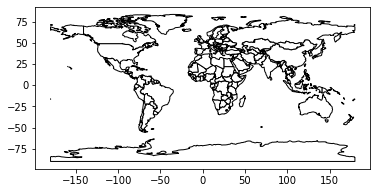

In [98]:
base = world.plot(color='white', edgecolor='black')

In [102]:
geoscoded_gdf.plot(ax = base, marker='*', color='green', markersize=5);

<Figure size 432x288 with 0 Axes>

In [104]:
geogdf = geoscoded_gdf.to_crs(world.crs)
 "#f4a261ff", "#e76f51ff"

In [112]:
import contextily as cx

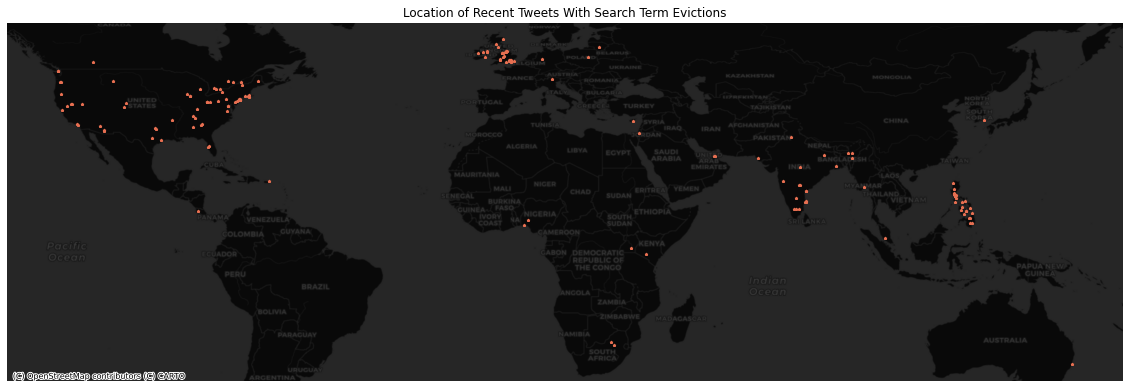

In [125]:
fig, ax = plt.subplots(figsize=(20, 10))

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.

#ax.set_aspect('equal')

#world.plot(ax=ax, color='white', edgecolor='black')

geoscoded_gdf.plot(ax = ax, marker='*', color="#e76f51ff", markersize=7)

cx.add_basemap(ax, source=cx.providers.CartoDB.DarkMatter, crs=geoscoded_gdf.crs)
ax.set_axis_off()
ax.set(title="Location of Recent Tweets With Search Term Evictions")

plt.savefig('tweetsWorld.png')

In [126]:
import wordcloud

ModuleNotFoundError: No module named 'wordcloud'